# Intro to Scikit-Learn and Model Evaluation 

># Exploring the Response Variable an Concluding the Initial Exploration 

In [1]:
#Loading the reqiured packages and dataset to use for our analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

#loading the dataset will cleaned earlier 

df = pd.read_csv("Chapter_1_cleaned_data.csv")

In [2]:
# Now to find the proportion of the positive class which is the group that has "default payment next month = 1"  
# In short this is the group that has defaulted. The negative class are those that did not 

#Getting the avg of accounts that have defaulted since the target variable is a 0 or 1 We can just take the avg of the col

df["default payment next month"].mean()

0.2217971797179718

In [3]:
# avg of accounts that have defaulted is 22% 

# obtaining the counts for each class

df.groupby("default payment next month")["ID"].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [4]:
# While 22% is low it is sufficient for us to accomplish our task 

# Introduction to Scikit-Learn

In [5]:
# First steps in creating the Logistic Regression model

from sklearn.linear_model import LogisticRegression
my_lr = LogisticRegression()
my_lr

LogisticRegression()

In [6]:
my_new_lr = LogisticRegression(C= 1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,multi_class="auto",n_jobs=None,penalty="l2",random_state=None,solver="warn",tol=0.0001,verbose=0,warm_start=False)

In [7]:
my_new_lr.C= 0.1
my_new_lr.solver = "liblinear"
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

In [8]:
# testing our model with data we obtain the first 10 samples from the education feauture called X and the response variable y

X = df["EDUCATION"][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [9]:
y = df["default payment next month"][:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
# now using the data to fit our logistic regression 
my_new_lr.fit(X,y)

LogisticRegression(C=0.1, solver='liblinear')

In [11]:
# We now have a trained model in my_new_lr the change happened inplace

#Now we use the model to make predictions on new data


new_X = df["EDUCATION"][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [12]:
# making a new predictions like this 

my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
# Viewing what the true values corresponding to these predictions

df["default payment next month"][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

# Generating Synthetic Data

In [14]:
# creating a numpy 1d array of feature X consisting of 1000 random real numbers between 0 and 10. We will seed the random number
# generator. Then we will use numpy.random.uniform which draws from the uniform distribution and return an array of whatever size
# we specify

np.random.seed(seed=1)
X = np.random.uniform(low=0.0,high=10.0,size=(1000,))
X[:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

# Data for a Linear Regression

In [15]:
# to implement the response variable we calculate the slope times the feature array X plus some gaussian noise using numpy and an 
# intercept

# we first create the seed

np.random.seed(seed=1)

# We create the slope and intercept

slope = 0.25
intercept = -1.25

# Now we create the response variable using the equation for a line with the addition of some gaussian noise 

y = slope * X + np.random.normal(loc=0.0,scale=1.0,size=(1000,)) + intercept


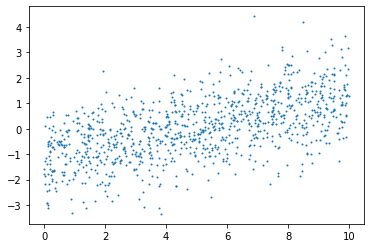

In [16]:
# Now to visualize the data using a scatter plot
plt.scatter(X,y,s=1)

In [17]:
# This is exactly what we hoped for noisy linear data

# Linear Regression in Scikit-Learn

In [18]:
# creating a linear regression model using the default options. Linear Regression does not have as many options as Logistic

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [19]:
# now fitting the model and examining the intercept and coefficients

lin_reg.fit(X.reshape(-1,1),y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.161256600282589
[0.24002588]


In [20]:
# finally we use the model to make predictions on feature values using the same feature data 

y_pred = lin_reg.predict(X.reshape(-1,1))

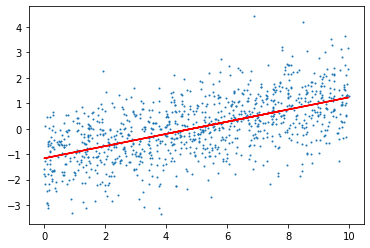

In [21]:
# plotting y_pred against feature X as a line plot over the scatter plot of the feature and response data

plt.scatter(X,y,s=1)
plt.plot(X,y_pred,"r")

# Model Performance Metrics for Binary Classification

In [22]:
# Will add the two things to consider when choosing a metric later pg. 110

# Splitting the Data: Training and Testing sets

In [23]:
# Using use the built in function train_test_split within scikit-learn to split the data so that 80% will be used for training 
# and 20% used for testing


from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(df["EDUCATION"].values.reshape(-1,1),df["default payment next month"].values,test_size=0.2,random_state=24)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [25]:
# Testing to see if the nature of the data is the same between sets. In this case testing to see if fraction of the positive class
# similar
print(np.mean(y_train))
print(np.mean(y_test))

0.223102526838873
0.21657603600225014


In [26]:
# This good they are also similiar to the overall data

# Classification Accuracy

In [27]:
# We proceed to fit an example model to illustrate binary classification metrics. We will continue to use a logistic regression
# with near-default options. 

from sklearn.linear_model import LogisticRegression

In [28]:
example_lr = LogisticRegression(C= 1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,multi_class="auto",n_jobs=None,penalty="l2",random_state=None,solver="liblinear",tol=0.0001,verbose=0,warm_start=False)

In [29]:
# Now we proceed to train the model 

example_lr.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [30]:
y_pred = example_lr.predict(X_test)

In [31]:
# How do we assess the quality of these predictions

# First we compute the accuracy which is defined as the proportion of samples that were correctly classified

# there are two ways to calculate accuracy

# first using the the score method

example_lr.score(X_test,y_test)

0.7834239639977498

In [32]:
# Second importing the metrics module from sklearn

from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.7834239639977498

In [33]:
# This percentage may not be the best due to the fact since a majority of the neg cases are zero and at 78% the model could guess 
# all zeros and still get the same result. There are better metrics to use when using binary classification

# True Positive Rate, False Positive Rate, and Confusion Matrix

In [34]:
# Calculating the True and False Positive and Negative Rates and Confusion Matrix in Python
# First the manual wya to calculate the true and false positive and negative rates

P = sum(y_test)
print(P)

1155


In [35]:
# Now for true positives 
TP = sum((y_test==1) & (y_pred==1))
print(TP)

0


In [36]:
# The True positive rate is the proportion of true positives to positives

TPR = TP/P
print(TPR)

0.0


In [37]:
# id the false negatives
FN = sum((y_test==1) & (y_pred==0))
print(FN)

1155


In [38]:
# Calculating the false negative rate
FNR = FN/P
print(FNR)

1.0


In [39]:
# This tells us that for the positive samples the model acted as a majority class null model(which is bad need to avoid) Every 
# positive sample was predicted to be negative, so none of them were correctly predicted

In [40]:
# Calculating the TNR and FPR

N = sum(y_test==0)
print(N)

4178


In [41]:
TN = sum((y_test==0)&(y_pred==0))
print(TN)

4178


In [42]:
FP = sum((y_test==0) & (y_pred==1))
print(FP)

0


In [43]:
TNR = TN/N
FPR = TP/N

print("The true negative rate is {} and the false positive rate is {}".format(TNR,FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [44]:
# Creating a confusion matrix using schlearn 
metrics.confusion_matrix(y_test,y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

# Discovering Predicted Probabilities: How does logistic regression make Predictions

##  Obtaining Predicted Probablilities from a trained Logistic Regression Model

In [45]:
# Directly accessing the predicted probabilities of these samples using .predict_probab method

y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77456295, 0.22543705],
       [0.77456295, 0.22543705],
       [0.79016179, 0.20983821],
       ...,
       [0.79016179, 0.20983821],
       [0.79016179, 0.20983821],
       [0.79016179, 0.20983821]])

In [46]:
# These two columns report the probability of belonging to either the negative or positive classes. The left columns is the 
# negative class or 0 and the right columns is the positive class or 1

#using np.sum to confirm that the sum of each samples' probablity adds to one

prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [47]:
#Checking the shape of the array

prob_sum.shape

(5333,)

In [48]:
# Checking to make sure all the elements are indeed one using the np.unique function

np.unique(prob_sum)

array([1.])

In [49]:
#examining the second columns or the postive membership 
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22543705, 0.22543705, 0.20983821, ..., 0.20983821, 0.20983821,
       0.20983821])

Text(0, 0.5, 'Number of samples')

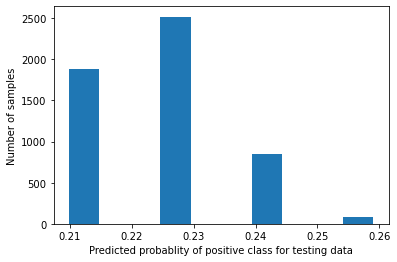

In [50]:
# plotting these probabilities to see what they look like in a histogram. 

plt.hist(pos_proba)
plt.xlabel("Predicted probablity of positive class for testing data")
plt.ylabel("Number of samples")

In [51]:
# From the histgram we can see that all of the predicted probabilities are below 0.5 this is the reason every sample was 
# predicted to be negative using the default threshold of 0.5.

Text(0, 0.5, 'Number of samples')

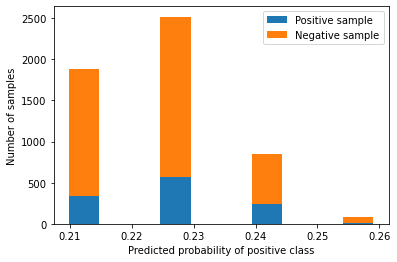

In [52]:
# Using a stacked histogram to see if moving the threshold to 0.25 would improve the performance of our classifier by looking at
# the far right examples

pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

plt.hist([pos_sample_pos_proba,neg_sample_pos_proba],histtype="barstacked")
plt.legend(["Positive sample","Negative sample"])
plt.xlabel("Predicted probability of positive class")
plt.ylabel("Number of samples")

In [53]:
# The above plot shows the true label of the samples for each predicted probablity. Since nearly all samples in the small far 
# right bin are negative if we were to decrease the threshold to 0.25 we would erroneously classify these as positive samples 
# and increase the false positive rate. At the same time we wouldn't have managed to classify many if any positive samples
# correctly, so our true positive rate wouldn't increase very much at all. Making the change to the threshold to 0.25 would 
# appear to decrease the accuracy of the model. 

# The Receiver Operating Characteristic (ROC) Curve

Text(0.5, 1.0, 'ROC Curve')

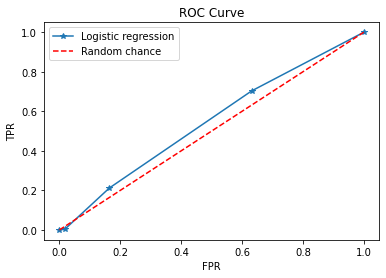

In [55]:
# ROC Curve is a plot that pairs the true positive rates and false positive rates that result from lowering the threshold down
# from 1 all the way to 0. 

# Using scikit-learn's built in functionality

fpr,tpr,thresholds = metrics.roc_curve(y_test,pos_proba)

# Plotting the fpr against the tpr 

plt.plot(fpr,tpr,"*-")
plt.plot([0,1],[0,1],"r--")
plt.legend(["Logistic regression","Random chance"])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")

In [56]:
# Viewing the thresholds used to calculate the ROC curve 
print(thresholds)

[1.25903847 0.25903847 0.24184056 0.22543705 0.20983821]


In [57]:
# Using sckit-learn to calculate the ROC AUC or C-statistic 
metrics.roc_auc_score(y_test,pos_proba)

0.5434650477972642

In [58]:
# Because the ROC AUC for logistic regression is really close to 0.5 this means that EDUCATION by itself is not a very effective
# classifier